# Part 1: The Gravitational Potential of the Earth

In [1]:
# Part 1
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from scipy.integrate import quad

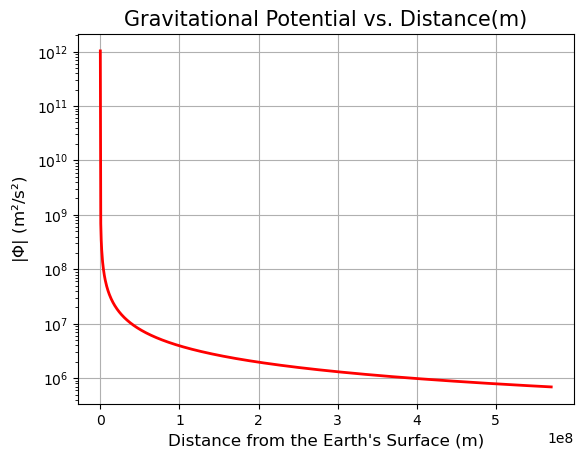

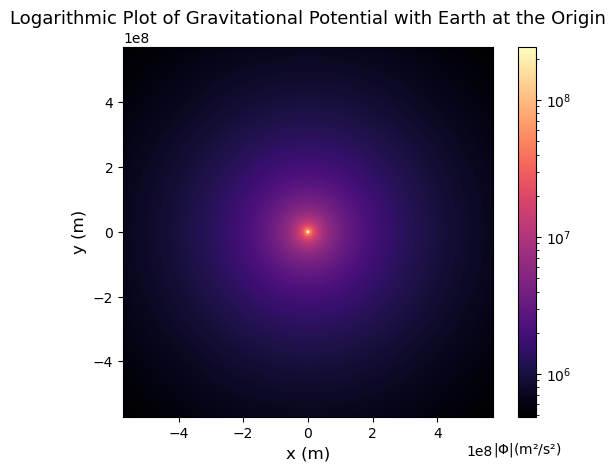

In [2]:
# Defining Variables
G = 6.67*10**(-11)           # Graviational Constant m^3/kg/s^2
massEarth = 5.9*10**24       # kg
radiusEarth = 6.378*10*6     # m
distEarthToMoon = 3.8*10**8  # m
# Number 1: Defining a function
def gravPotential(M, xM, yM, x, y):
    r = np.sqrt((x-xM)**2 + (y-yM)**2)
    return -G*M/r
    
# Number 2: 1D Plot, Figure 1
xVals = np.linspace(radiusEarth, 1.5*distEarthToMoon, 1000)
potential = np.abs(gravPotential(massEarth, 0, 0 , xVals, np.zeros_like(xVals)))
fig, ax= plt.subplots()
ax.plot(xVals, potential, color='r', linewidth=2)
ax.set_title("Gravitational Potential vs. Distance(m)", fontsize=15)
ax.set_xlabel("Distance from the Earth's Surface (m)", fontsize=12)
ax.set_ylabel(r'$|\Phi|$ (m²/s²)', fontsize=12)
ax.set_yscale("log") # only making the y axis logarithmic since potential falls fast with r
ax.grid()

# Number 3: 2D Mesh Plot, Figure 2
#Variables
grid_size = 500
xRange = np.linspace(-1.5 * distEarthToMoon, 1.5 * distEarthToMoon, grid_size)
yRange = np.linspace(-1.5 * distEarthToMoon, 1.5 * distEarthToMoon, grid_size)
X, Y = np.meshgrid(xRange, yRange)
Phi = np.abs(gravPotential(massEarth, 0, 0, X, Y))

fig, ax2=plt.subplots()
mesh = ax2.pcolormesh(X, Y, Phi, shading='auto', norm=plt.matplotlib.colors.LogNorm(), cmap='magma')
cbar = fig.colorbar(mesh, ax=ax2) # add variables
cbar.ax.set_xlabel(r'$|\Phi|$(m²/s²)', labelpad=17, fontsize=10, loc='center')
ax2.set_xlabel("x (m)", fontsize=12)
ax2.set_ylabel("y (m)", fontsize=12)
ax2.set_title("Logarithmic Plot of Gravitational Potential with Earth at the Origin", fontsize=13, loc='center')
ax2.set_aspect('equal')

# Part 2: The Gravitational Potential of the Earth-Moon System

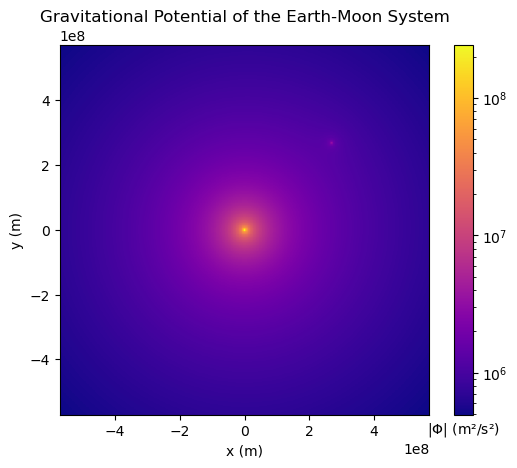

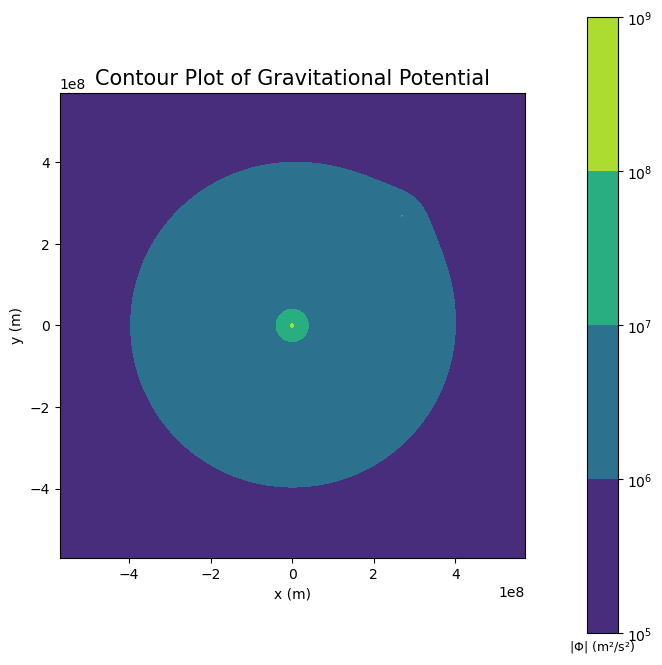

In [3]:
#Variables
# Where Earth is at (0,0), moon at 
xMoon = distEarthToMoon/np.sqrt(2)
yMoon = distEarthToMoon/np.sqrt(2)
massMoon = 7.3*10**22 #kg
phiEarth = gravPotential(massEarth, 0, 0, X, Y)
phiMoon = gravPotential(massMoon, xMoon, yMoon, X, Y)
phiTotal = np.abs(phiEarth + phiMoon)

# Numeber 1, Figure 3
fig, ax1 = plt.subplots()
mesh = ax1.pcolormesh(X,Y, phiTotal, norm=colors.LogNorm(), cmap = 'plasma')
cbar = fig.colorbar(mesh, ax=ax1)
cbar.ax.set_xlabel(r'$|\Phi|$ (m²/s²)', fontsize = 10)
ax1.set_xlabel("x (m)")
ax1.set_ylabel("y (m)")
ax1.set_title("Gravitational Potential of the Earth-Moon System")
ax1.set_aspect('equal')

#Number 2, Figure 4
fig, ax3 = plt.subplots(figsize=(8, 8))
contour = ax3.contourf(X, Y, phiTotal, levels=30, norm=colors.LogNorm(), cmap='viridis')
cbar = fig.colorbar(contour, ax=ax3, pad=0.1)
cbar.ax.set_xlabel(r'$|\Phi|$ (m²/s²)', fontsize=9)
ax3.set_xlabel("x (m)")
ax3.set_ylabel("y (m)")
ax3.set_title("Contour Plot of Gravitational Potential", fontsize=15)
ax3.set_aspect('equal')

# Part 3: The Gravitational Force Field of the Earth-Moon System

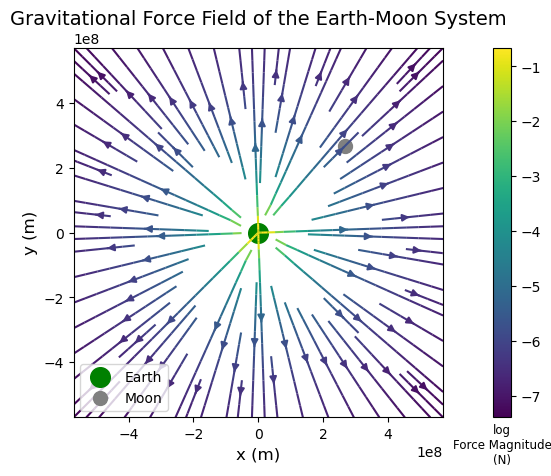

In [4]:
# Number 1: Function
def gravForce2(M1,x1,y1,x2,y2):
    dx = x2-x1
    dy= y2-y1
    r21 =  dx**2 + dy**2
    # avoiding the possibility of 0
    if r21< 1e6:
        return 0, 0
    fMag = G * M1 / r21
    r = np.sqrt(r21)
    Fx = fMag * dx / r
    Fy = fMag * dy / r
    return Fx, Fy
    
# Making the grid
N = 30
xRange2 = np.linspace(-1.5 * distEarthToMoon, 1.5 * distEarthToMoon, N)
yRange2 = np.linspace(-1.5 * distEarthToMoon, 1.5 * distEarthToMoon, N)
X2, Y2 = np.meshgrid(xRange2, yRange2)
FxTotal = np.zeros_like(X2)
FyTotal = np.zeros_like(Y2)
for i in range(N):
    for j in range(N):
        FxEarth, FyEarth = gravForce2(massEarth, 0, 0, X2[i,j], Y2[i,j])
        FxMoon, FyMoon = gravForce2(massMoon, 0, 0, X2[i,j], Y2[i,j])
        FxTotal[i,j] = FxEarth + FxMoon
        FyTotal[i,j] = FyEarth + FyMoon
fMagnitude = np.sqrt(FxTotal**2 + FyTotal**2)
fMagnitude[fMagnitude == 0] = np.min(fMagnitude[fMagnitude > 0])  # Preventing log(0)

# Number 2: Plotting, Figure 5
fig, ax = plt.subplots()
stream = ax.streamplot(X2, Y2, FxTotal, FyTotal, color=np.log(fMagnitude), cmap ='viridis')
ax.scatter(0,0, color='green', s=200, label ='Earth') # Making earth seem bigger, proportional
ax.scatter(xMoon, yMoon, color ='grey', s=100, label = 'Moon')
ax.legend(loc = 'lower left')
cbar = plt.colorbar(stream.lines, ax=ax, pad=0.1)
cbar.ax.set_xlabel("log\nForce Magnitude\n(N)", fontsize=8.5)
ax.set_title("Gravitational Force Field of the Earth-Moon System", fontsize=14)
ax.set_xlabel("x (m)", fontsize=12)
ax.set_ylabel("y (m)", fontsize=12)
ax.set_xlim([-1.5 * distEarthToMoon, 1.5 * distEarthToMoon])
ax.set_ylim([-1.5 * distEarthToMoon, 1.5 * distEarthToMoon])
ax.set_aspect("equal")

# Part 4: Altitude of the Saturn V Rocket

In [5]:
# Variables
m0 = 2.8 * 10**6     # Inital mass kg
vEarth = 2.4*10**3   # Exhaust velocity m/s
mf = 7.5*10**5       # Final mass kg
mDot = 1.3*10**4     # Burn rate kg/s
g = 9.81 # Gravitational Acceleration m/s^2
# Number 1: Calculate burn time
T = (m0-mf)/mDot
# Number 2: Function
def deltaV(t, m0,mf,mDot, vEarth, g):
    m_t = m0 - mDot*t
    if m_t <= mf:
        return 0 # No remaining fuel
    return vEarth * np.log(m0/m_t)-g*t
    
# Number 3: Compute altitude at the end of the burn
h, _ = quad(deltaV, 0, T, args=(m0, mf, mDot, vEarth, g))

print(f"Burn time is {T:.2f} seconds")
print(f"Altitude at burnout is {(h/1000):.2f} kilometers")

Burn time is 157.69 seconds
Altitude at burnout is 74.09 kilometers
